## Searching for rings in pleconaril

In [6]:
%matplotlib inline
import molsysmt as msm
import networkx as nx
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt 
import pandas as pd
import collections
from pylab import *
from molecular_graph import molecular_graph

#ignore warinings
import warnings
warnings.filterwarnings('ignore')

### Loading file for pleconaril 

In [2]:
molecular_system = msm.convert('1NCR', 'molsysmt.MolSys')
molecular_system = msm.remove_solvent(molecular_system, water=True, ions=True)
molecular_system = msm.add_missing_hydrogens(molecular_system, pH=7.4)
msm.info(molecular_system, target='component')

index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,4489,285,0,0,protein,0,Protein_0
1,7571,490,1,1,protein,1,Protein_1
2,104,7,3,2,peptide,2,Peptide_0
3,332,22,3,3,peptide,3,Peptide_1
4,27,1,4,4,small molecule,4,W11
5,15,1,5,5,small molecule,5,MYR


Number of nodes: 27
Number of edges: 29


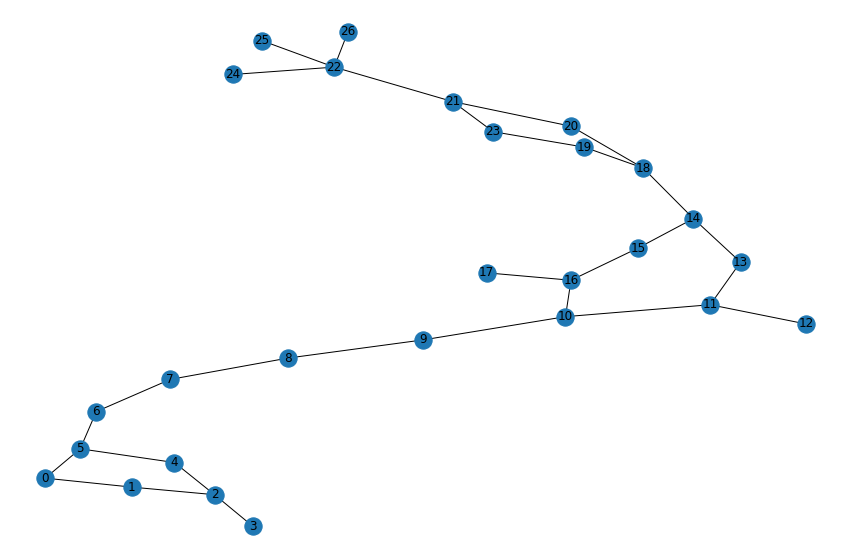

In [3]:
# Create the molecular graph for pleconaril
mol_graph = molecular_graph(molecular_system, selection='entity_name=="W11"', reset_index=True)

# Add the missing bonds
mol_graph.add_edge(22, 25)
mol_graph.add_edge(22, 26)
print("Number of nodes: {}".format(len(mol_graph.nodes())))
print("Number of edges: {}".format(len(mol_graph.edges())))

fig, ax = plt.subplots(figsize=(15,10))
nx.draw(mol_graph, with_labels=True, ax=ax)
show()

### Searching for rings in the molecule

In [7]:
def find_rings(molecular_graph):
    """Find all rings in a molecular graph"""
    rings = []
    for node in list(molecular_graph.nodes()):
        ringset = get_ring(molecular_graph, node)
        if ringset and ringset not in rings:
            rings.append(ringset)
    
    return rings

def get_ring(molecular_graph, root):
    """Find a ringset in a molecular graph starting from a root node. The output depends on the root node"""
    ringset = []
    queue = collections.deque([root, root])
    path = [None] * (len(molecular_graph.nodes())) #Initialize paths to null
    path[root] = [root]

    while queue:

        # Dequeue a node from front of queue
        front_node = queue.popleft()
        source = queue.popleft()

        for neighbor in molecular_graph.adj[front_node]:

            if neighbor == source:
                continue

            if path[neighbor] is None:
                path[neighbor] = path[front_node] + [neighbor]
                path[neighbor].sort()
                queue.append(neighbor)
                queue.append(front_node)

            elif path[neighbor] is not None:
                # Compute intersection
                intersect = intersection(path[front_node], path[neighbor])
                if len(intersect) == 1: # If the intersection is a singleton there is a valid ring closure
                    ringset = Union(path[front_node], path[neighbor])
                    break

        if ringset:
            break
    
    return ringset
    
def intersection(lst1, lst2):
    """Compute the intersection of two lists"""
    return list(set(lst1) & set(lst2))

def Union(lst1, lst2):
    """Union of two lists"""
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [10]:
rings = find_rings(mol_graph)
for i, ring in enumerate(rings):
    print(f"Ring {i}: {ring}")

Ring 0: [0, 1, 2, 4, 5]
Ring 1: [16, 10, 11, 13, 14, 15]
Ring 2: [18, 19, 20, 21, 23]
